<a href="https://colab.research.google.com/github/hubeidata/semaforo_nutricional/blob/Task_Aldahir/Codigos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalador de dependencias
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=10bdcb0def7ee6e0f887f28274a5ea8ed5e1c12cc2ce82b51b397983185a94be
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


Generador de imagenes

In [ ]:
import cv2
import os
import imutils
personName = 'Aldahir'

#Cambia a la ruta donde hayas almacenado Data
dataPath = '/content/drive/MyDrive/personas'
personPath = dataPath + '/' + personName
if not os.path.exists(personPath):
    print('Carpeta creada: ',personPath)
    os.makedirs(personPath)
cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
cap = cv2.VideoCapture('/content/drive/MyDrive/grabacion/Aldahir_01.mp4')
faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
count = 0
while True:

    ret, frame = cap.read()
    if ret == False: break
    frame =  imutils.resize(frame, width=640)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    auxFrame = frame.copy()
    faces = faceClassif.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
        rostro = auxFrame[y:y+h,x:x+w]
        rostro = cv2.resize(rostro,(150,150),interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(personPath + '/rotro_{}.jpg'.format(count),rostro)
        count = count + 1
#    cv2.imshow('frame',frame)
    k =  cv2.waitKey(1)
    if k == 27 or count >= 300:
        break
cap.release()
cv2.destroyAllWindows()

Generador de modelo

In [ ]:
import cv2
import os
import numpy as np
dataPath = "/content/drive/MyDrive/personas"
dir_list = os.listdir(dataPath)
print("Lista archivos:", dir_list)
labels = []
facesData = []
label = 0
for name_dir in dir_list:
     dir_path = dataPath + "/" + name_dir

     for file_name in os.listdir(dir_path):
          image_path = dir_path + "/" + file_name
          #print(image_path)
          image = cv2.imread(image_path, 0)
          #cv2.imshow("Image", image)
          #cv2.waitKey(10)
          facesData.append(image)
          labels.append(label)
     label += 1
#print("Etiqueta 0: ", np.count_nonzero(np.array(labels) == 0))
#print("Etiqueta 1: ", np.count_nonzero(np.array(labels) == 1))

# LBPH FaceRecognizer
face_mask = cv2.face.LBPHFaceRecognizer_create()
# Entrenamiento
print("Entrenando...")
face_mask.train(facesData, np.array(labels))
# Almacenar modelo
face_mask.write("/content/drive/MyDrive/Models/My_model.xml")
print("Modelo almacenado")

Lista archivos: ['Aldahir', 'Tayra', 'Propio']
Entrenando...
Modelo almacenado


Reconocimiento Facial

imagePaths= ['Aldahir', 'Tayra', 'Propio']


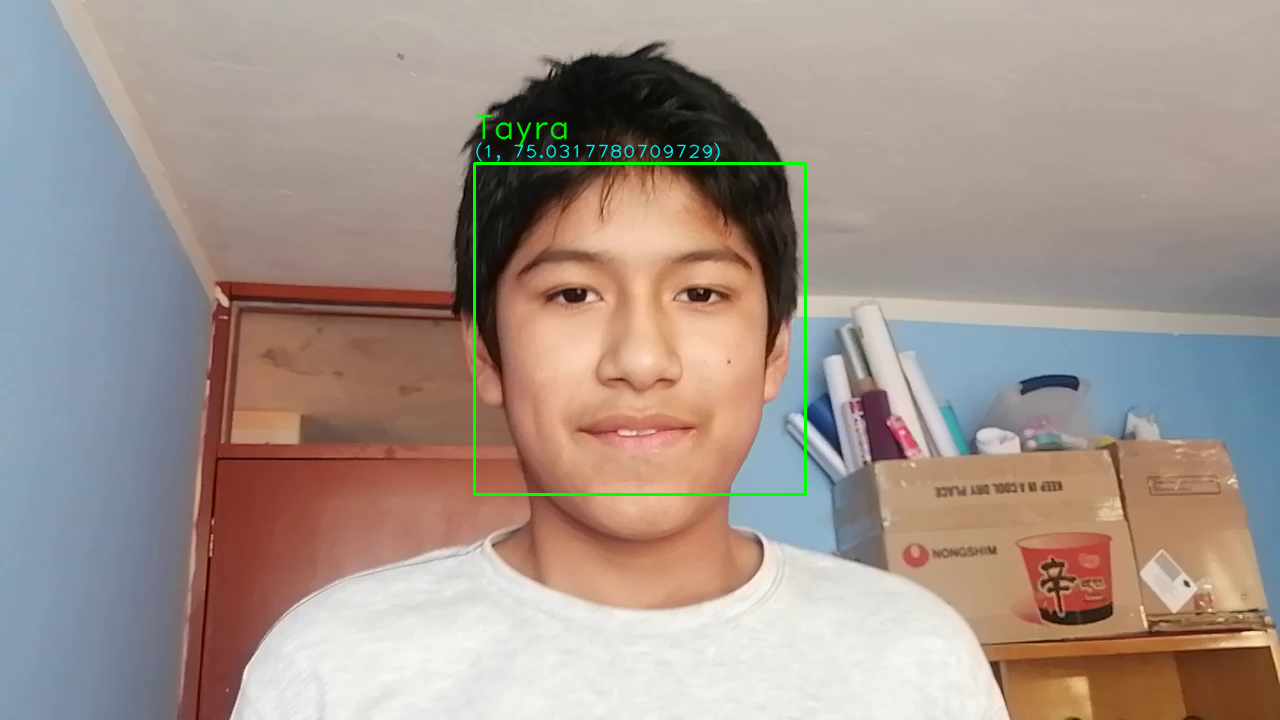

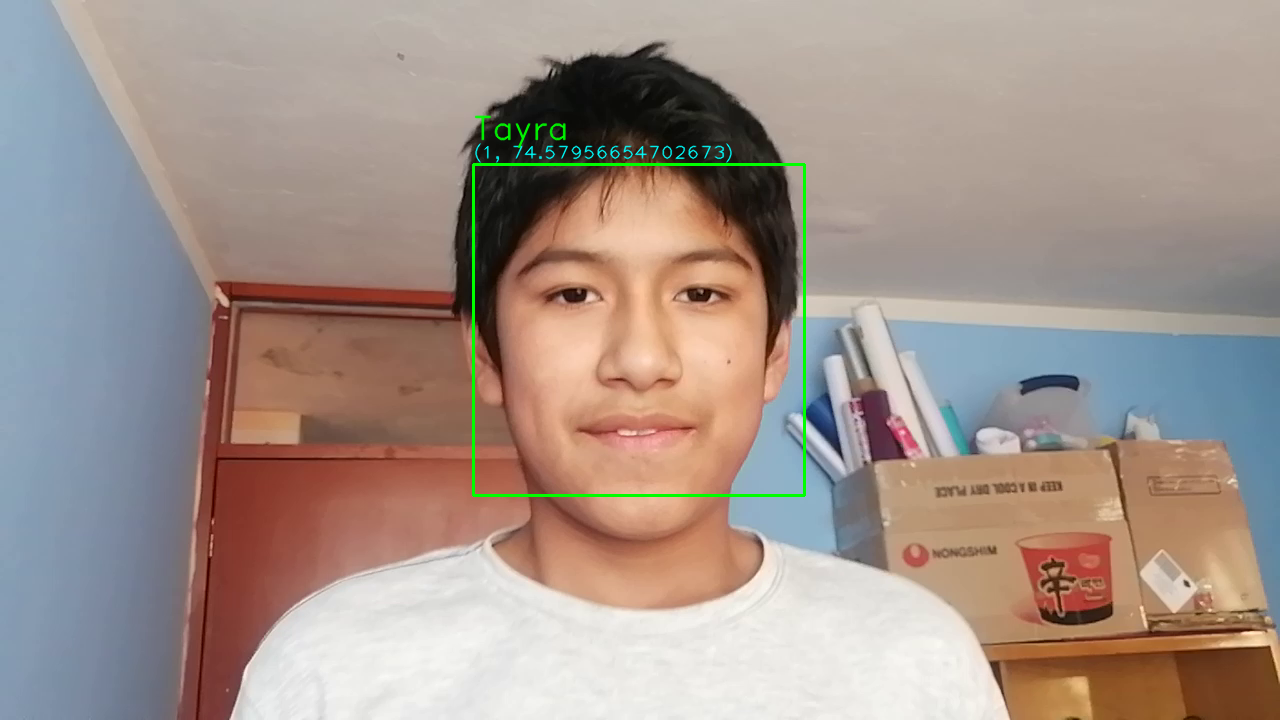

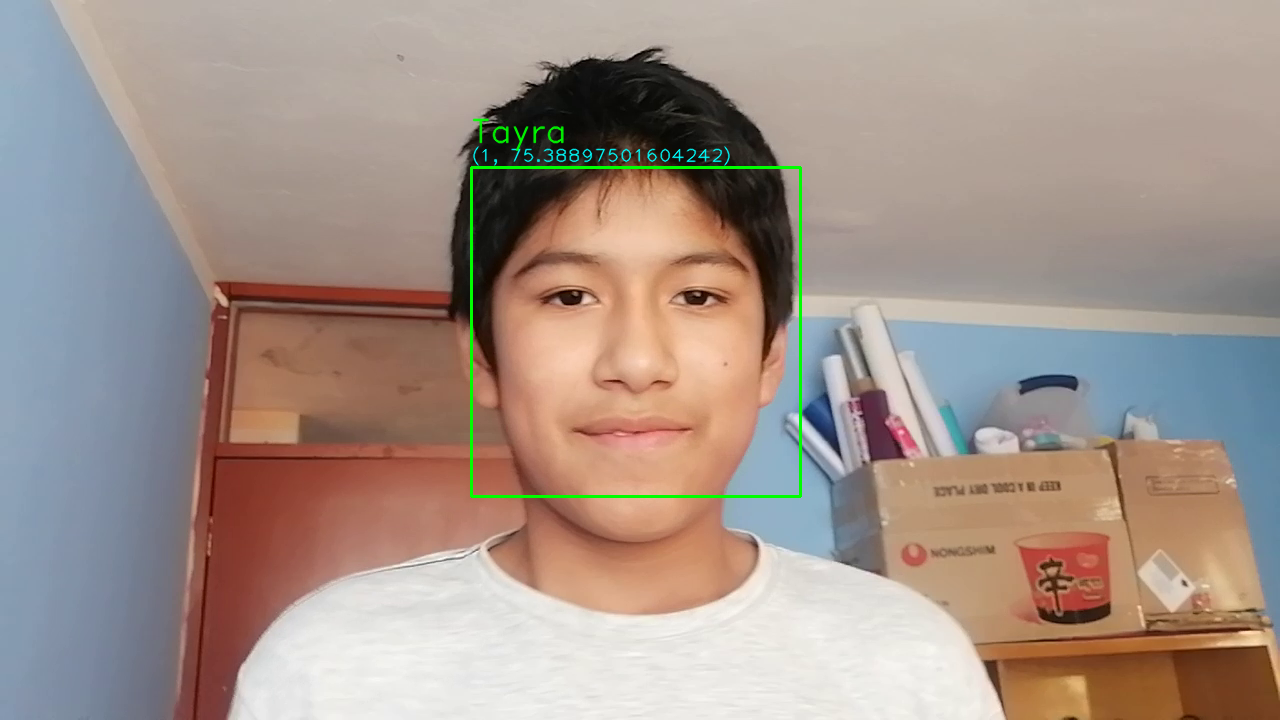

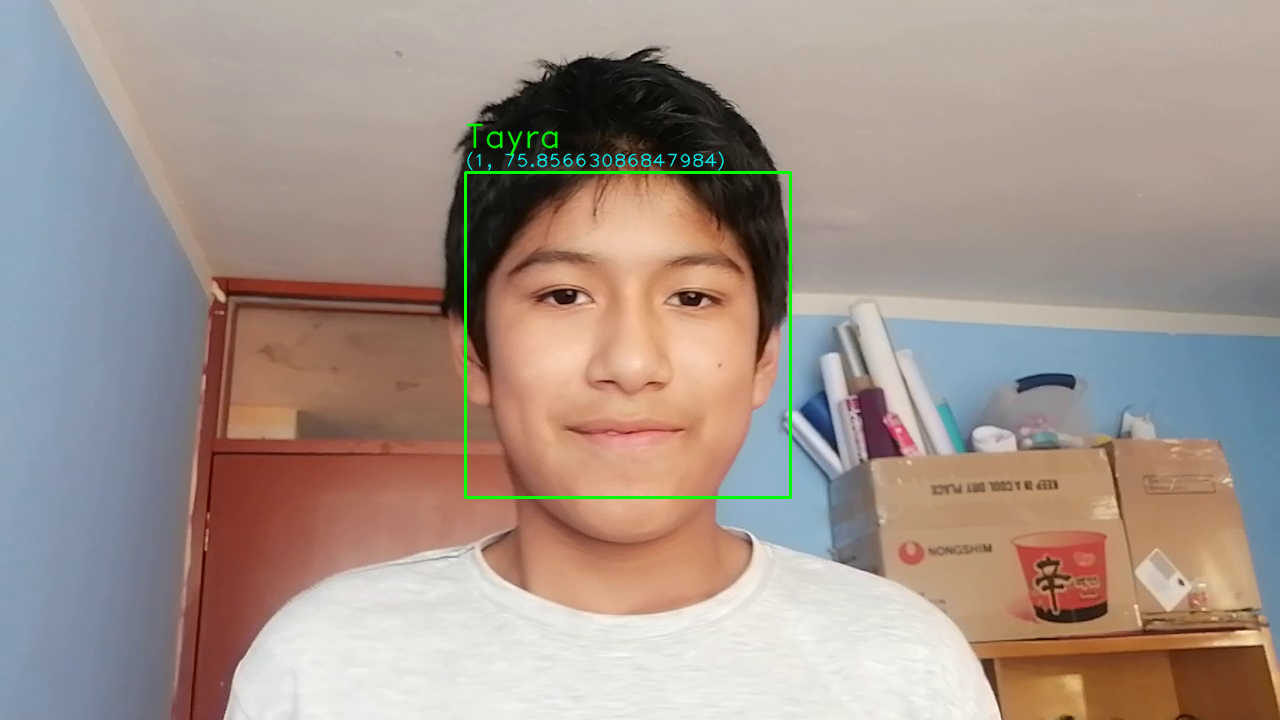

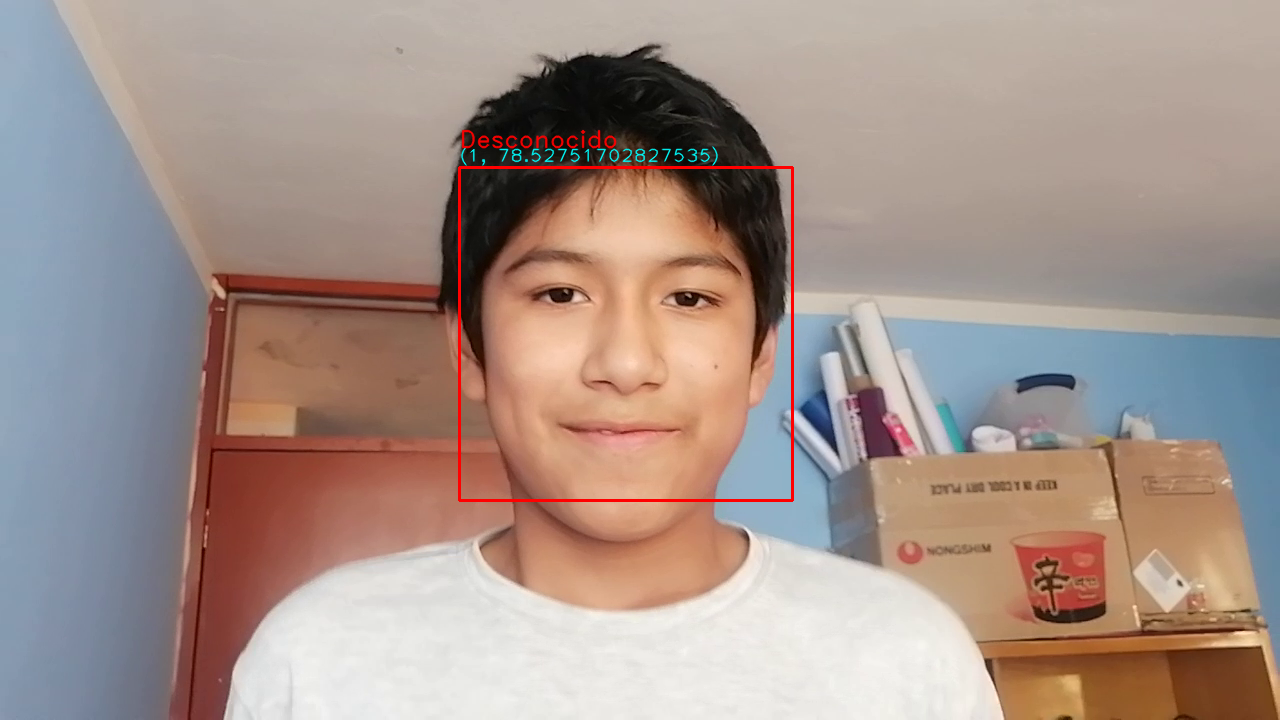

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

dataPath = '/content/drive/MyDrive/personas' #Cambia a la ruta donde hayas almacenado Data
imagePaths = os.listdir(dataPath)
print('imagePaths=',imagePaths)

#face_recognizer = cv2.face.EigenFaceRecognizer_create()
#face_recognizer = cv2.face.FisherFaceRecognizer_create()
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

# Leyendo el modelo
#face_recognizer.read('modeloEigenFace.xml')
#face_recognizer.read('modeloFisherFace.xml')
face_recognizer.read('/content/drive/MyDrive/Models/My_model.xml')

#cap = cv2.VideoCapture(0,cv2.CAP_DSHOW)
cap = cv2.VideoCapture('/content/drive/MyDrive/grabaciones/Aldahir_01.mp4')

faceClassif = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

count = 0

while True:
  ret,frame = cap.read()
  if ret == False:
    print("Saliendo")
    break
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  auxFrame = gray.copy()

  faces = faceClassif.detectMultiScale(gray,1.3,5)

  for (x,y,w,h) in faces:
    rostro = auxFrame[y:y+h,x:x+w]
    rostro = cv2.resize(rostro,(150,150),interpolation= cv2.INTER_CUBIC)
    result = face_recognizer.predict(rostro)

    cv2.putText(frame,'{}'.format(result),(x,y-5),1,1.3,(255,255,0),1,cv2.LINE_AA)
    '''
    # EigenFaces
    if result[1] < 5700:
      cv2.putText(frame,'{}'.format(imagePaths[result[0]]),(x,y-25),2,1.1,(0,255,0),1,cv2.LINE_AA)
      cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
    else:
      cv2.putText(frame,'Desconocido',(x,y-20),2,0.8,(0,0,255),1,cv2.LINE_AA)
      cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)

    # FisherFace
    if result[1] < 500:
      cv2.putText(frame,'{}'.format(imagePaths[result[0]]),(x,y-25),2,1.1,(0,255,0),1,cv2.LINE_AA)
      cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
    else:
      cv2.putText(frame,'Desconocido',(x,y-20),2,0.8,(0,0,255),1,cv2.LINE_AA)
      cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)
    '''
    # LBPHFace
    if result[1] < 45:
      cv2.putText(frame,'{}'.format(imagePaths[result[0]]),(x,y-25),2,1.1,(0,255,0),1,cv2.LINE_AA)
      cv2.rectangle(frame, (x,y),(x+w,y+h),(0,255,0),2)
    else:
      cv2.putText(frame,'Desconocido',(x,y-20),2,0.8,(0,0,255),1,cv2.LINE_AA)
      cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)
  count = count + 1
  cv2_imshow(frame)
  k = cv2.waitKey(1)
  if k == 27 or count >= 5:
   break

cap.release()
cv2.destroyAllWindows()

Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
